In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from model import power_law_distribution as dist

In [37]:
%matplotlib inline
sns.set_style('whitegrid')
np.random.seed(42)

# Activity potential distribution

Each user in the model has a activity potential, which is the probability that he becomes active within each time step. Since the activity potential of humans is usually heterogeneous it is approximated with a power-law activity potential distribution $F(x_i) \sim x_i^{-\gamma}$. Where $x_i \in [\varepsilon, 1]$ denotes the activity potential of the user $i$ and $\varepsilon$ is the minimum activity constant. 

## Example:

In [38]:
# parameter of the distribution
gamma = 2.5
epsilon = 0.01

### Expected value of the probability distribution

In [39]:
print('expected activity value =', dist.expected_value(gamma, epsilon))

expected activity value = 0.02702702702702703


### Probability density function

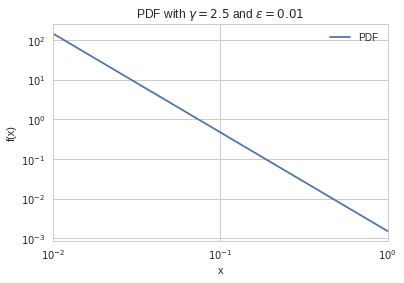

In [46]:
pdf = dist.pdf(gamma, epsilon)
x_vals = np.linspace(epsilon, 1, num=10000)
y_pdf = [pdf(x) for x in x_vals]

fig, ax = plt.subplots()
ax.loglog(x_vals, y_pdf, label='PDF')
ax.set_title('PDF with $\gamma = {gamma}$ and $\epsilon = {epsilon}$'.format(gamma=gamma, epsilon=epsilon))
ax.legend(loc='best')
ax.set_xlim(0.01, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)');
#plt.savefig('output.png', dpi=300, bbox_inches='tight')

### Cumulative distribution function

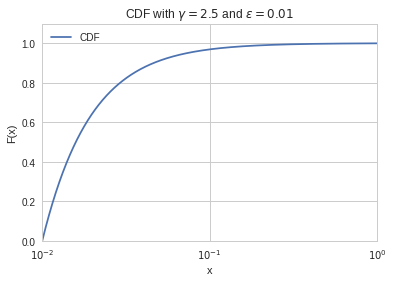

In [48]:
cdf = dist.cdf(gamma, epsilon)
x_vals = np.linspace(epsilon, 1, num=10000)
y_cdf = [cdf(x) for x in x_vals]

fig, ax = plt.subplots()
ax.semilogx(x_vals, y_cdf, label='CDF')
ax.set_title('CDF with $\gamma = {gamma}$ and $\epsilon = {epsilon}$'.format(gamma=gamma, epsilon=epsilon))
ax.legend(loc='best')
ax.legend()
ax.set_xlim(0.01, 1)
ax.set_ylim(0, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('F(x)');
#plt.savefig('output1.png', dpi=300, bbox_inches='tight')

### Estimated probability density using inverse transform sampling

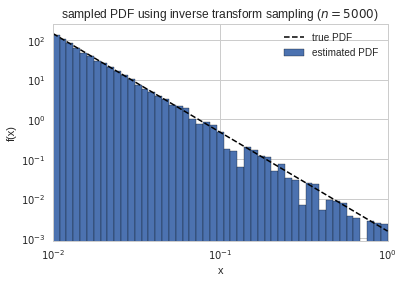

In [57]:
inv_cdf = dist.inv_cdf(gamma, epsilon) 
x_vals = np.linspace(epsilon, 1, num=10000)

nsamples = 5000
sampler = dist.inverse_transform_sampling(inv_cdf)
samples = [next(sampler) for _ in range(nsamples)]

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('sampled PDF using inverse transform sampling ($n = {n}$)'.format(n=nsamples))
ax.hist(samples, bins=10**np.linspace(np.log10(epsilon), np.log10(1.0), 50), normed=True, label='estimated PDF', edgecolor='black')
ax.plot(x_vals, y_pdf, 'k--', label='true PDF', linewidth=1.5)
ax.legend()
ax.set_xlim(0.01, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)');
#plt.savefig('output.png', dpi=300, bbox_inches='tight')